[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Humboldt-WI/bads/blob/master/exercises/5_ex_supervised_learning.ipynb) 

# Chapter 5 - Algorithms for supervised learning 
The following exercises test your familiarity with the content of chapter 5. The corresponding [demo notebook](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/5_nb_supervised_learning.ipynb) was quite heavy including a walkthrough of building logit and tree models from scratch. Given the algorithm-heavy demo notebook, we opted for a somewhat light exercise session that basically allows you to verify some of the claims made in the lecture. Specifically, the exercise revisits the lecture part on linear and logistic regression for classification. After completing the exercises, you will have gained even more confidence in logistic regression being the better approach for classification. Further, and this is the main point of the tasks, you will have further improved your Python programming skills. 

Have fun with the following tasks.

## Exercise 1: 
We established in the lecture, that the linear regression model is not suitable for classification problems. Let's test this claim empirically.

### 1.1 Synthetic data
Create a synthetic data set for binary classification using the sklearn function `make_classification()`. We want to plot the data later. So use only two input variables.

(1000, 2)
(1000,)


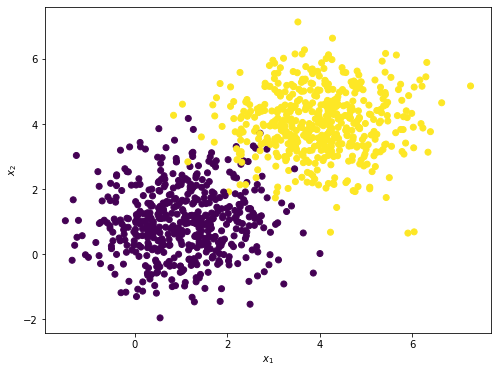

In [47]:
# Creation of synthetic data (make sure to have imported relevant libraries)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

n = 1000  # size of the synthetic data 
#X, y = make_classification(n, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1)
X, y = make_blobs(n_samples=n, n_features=2, centers=[[1, 1], [4, 4]], cluster_std=[1, 1])

print(X.shape)
print(y.shape)

# 2D plot of the synthetic two-class data set
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### 1.2 Linear regression
We discussed the analytical solution to the least-squares loss minimization problem in the lecture. To recall, using our standard notation, we can compute the OLS estimate of the regression parameters $\beta^*$ by 
$$ \beta^* = \left( X^{\top} X \right)^{-1}  X^{\top}  y $$

Calculate $\beta^*$ using numpy. Recall that you need to augment $X$ with a column of ones to ensure that your regression model includes an intercept.  

In [52]:
X.shape

(1000, 2)

In [53]:
(X.T).shape

(2, 1000)

In [57]:
# OLS estimate of regression coefficients
beta = np.dot( np.dot(np.linalg.inv( np.dot(X.T, X) ), X.T), y)

beta

array([0.11009772, 0.110079  ])

In [66]:
const = np.ones(n).reshape(-1, 1)
# alternatively
const = np.ones(shape=(n,1))

X_ = np.concatenate((const, X), axis=1)
# alternatively
X_ = np.hstack((const, X))
print(X_.shape)
X_

(1000, 3)


array([[ 1.        ,  3.39183862,  5.22272766],
       [ 1.        ,  3.27099847,  3.64060667],
       [ 1.        ,  3.52786702,  3.45662618],
       ...,
       [ 1.        ,  3.42848911,  5.61853572],
       [ 1.        ,  2.38389864,  1.59917837],
       [ 1.        , -0.47033168,  0.41774027]])

In [67]:
beta = np.dot( np.dot(np.linalg.inv( np.dot(X_.T, X_) ), X_.T), y)
beta

array([-0.17717644,  0.13708232,  0.13200654])

### 1.3 Plotting
Recreate the 2D chart from the previous exercise. This time, however, your graph should also show the decision surface that corresponds to your regression model from task 1.2.

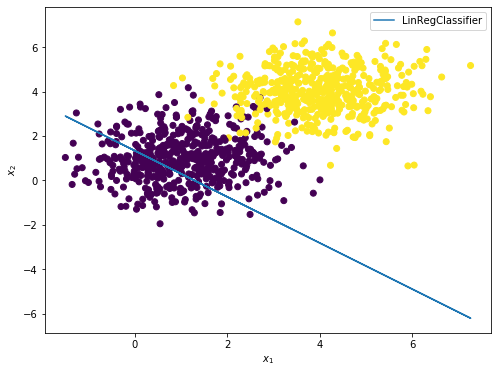

In [69]:
# 2D chart of the data set together with decision surface from the linear regression model

# regression line in 2D feature space:
# beta_0 + beta_1*x_1 + beta_2*x_2 = 0 => x_2 = -beta_0 / beta_2 - beta_1 / beta_2 * x_1

x1 = X[:,0]
x2 = -beta[0] / beta[2] - beta[1] / beta[2] * x1 

plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1, x2, label="LinRegClassifier")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="best")
plt.show()

### 1.4 Residuals
Compute and plot the residuals of your linear regression model. Inspecting the graph, how do you judge the adequacy of the linear regression model for the data at hand.

(1000,)


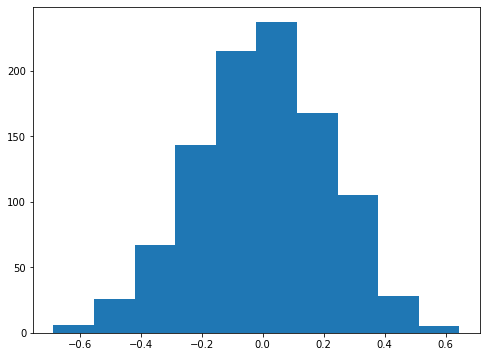

In [73]:
# Calculation and plotting of model residuals

yhat = np.dot(X_, beta)
print(yhat.shape)
resi = y - yhat
plt.hist(resi);

### 1.5 Logistic regression
Now estimate a logistic regression model for your synthetic data set using sklearn. Reproduce the plot from task 1.3 and incorporate the class boundary from the logistic model in the plot. It should also include the result from the linear regression. By visual inspection, does the logit model give a better fit? Briefly state your opinion. 

In [75]:
# Estimation of the logistic regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty="none")
logit_model = logit.fit(X, y)
logit_model

LogisticRegression(penalty='none')

In [78]:
intercept_logit = logit_model.intercept_[0]

In [81]:
logit_model.coef_[0][1]

2.7389887501905927

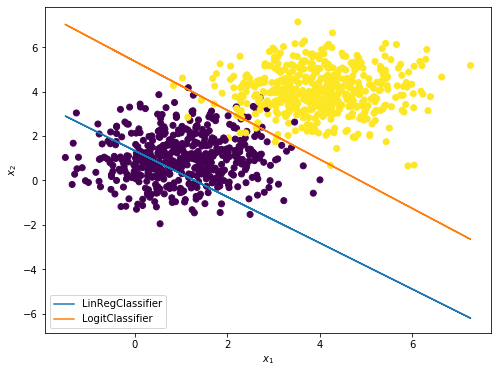

In [82]:
# Final plot of data and the two decision surfaces of the linear and logit model, respectively
x1 = X[:,0]
x2 = -beta[0] / beta[2] - beta[1] / beta[2] * x1 

# Same calculation for logit
x2_l = -intercept_logit / logit_model.coef_[0][1] - logit_model.coef_[0][0] / logit_model.coef_[0][1] * x1

plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1, x2, label="LinRegClassifier")
plt.plot(x1, x2_l, label="LogitClassifier")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="best")
plt.show()